Packages importeren

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import sqlite3
import sqlalchemy
import matplotlib.pyplot as plt

Connectie maken met Data Warehouse

In [4]:
DB = {'servername': 'ENVY-AKRAM\\SQLEXPRESS','database': 'Great Outdoors - Akram en Sylvan'}
conn_str = ('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')
export_conn = pyodbc.connect(conn_str, timeout=120)
export_cursor = export_conn.cursor()

engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={conn_str}")

# Hoe checken we of de connectie werkt?
print(export_cursor.execute("SELECT @@version;"))
'''
DB = {'servername': os.getenv('NAME'),
      'database': os.getenv('DATABASE'),
      'username': os.getenv('USER'),
      'password': os.getenv('PASSWORD')}

# Increase the connection timeout value to 30 seconds
conn_str = f"DRIVER=SQL Server;SERVER={DB['servername']};DATABASE={DB['database']};UID={DB['username']};PWD={DB['password']};Trusted_Connection=yes;Connection"

conn = pyodbc.connect(conn_str, timeout=120)
cursor = conn.cursor()
'''
export_cursor

Connectie maken met brongegevens

In [5]:
go_sales_connection = sqlite3.connect('Data\\Brongegevens\\go_sales.sqlite')
go_crm_connection = sqlite3.connect('Data\\Brongegevens\\go_crm.sqlite')
go_staff_connection = sqlite3.connect('Data\\Brongegevens\\go_staff.sqlite')
df_inventory = pd.read_csv('Data\\Brongegevens\\GO_SALES_INVENTORY_LEVELSData.csv')
df_product = pd.read_csv('Data\\Brongegevens\\GO_SALES_PRODUCT_FORECASTData.csv')

Helper functie tables inlezen

In [6]:
def readTable(connection, table):
    query = 'SELECT * FROM ' + table
    result = pd.read_sql_query(query, connection)
    result = result.loc[:, ~result.columns.str.contains('trial', case=False)]
    #verwijder trials
    return result

Database Go Sales

In [7]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_sales_connection)
country_go_sales = readTable(go_sales_connection, 'country')
order_details = readTable(go_sales_connection, 'order_details')
order_header = readTable(go_sales_connection, 'order_header')
order_method = readTable(go_sales_connection, 'order_method')
product = readTable(go_sales_connection, 'product')
product_line = readTable(go_sales_connection, 'product_line')
product_type = readTable(go_sales_connection, 'product_type')
retailer_site_go_sales = readTable(go_sales_connection, 'retailer_site')
return_reason = readTable(go_sales_connection, 'return_reason')
returned_item = readTable(go_sales_connection, 'returned_item')
sales_branch_go_sales = readTable(go_sales_connection, 'sales_branch')
sales_staff_go_sales = readTable(go_sales_connection, 'sales_staff')
sales_targetdata = readTable(go_sales_connection, 'SALES_TARGETData')
tables  


,name
0,country
1,order_details
2,order_header
3,order_method
4,product
5,product_line
6,product_type
7,retailer_site
8,return_reason
9,returned_item


Database Go Staff

In [8]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_staff_connection)
course = readTable(go_staff_connection, 'course')
sales_branch_go_staff = readTable(go_staff_connection, 'sales_branch')
sales_staff_go_staff = readTable(go_staff_connection, 'sales_staff')
satisfaction = readTable(go_staff_connection, 'satisfaction')
satisfaction_type = readTable(go_staff_connection, 'satisfaction_type')
training = readTable(go_staff_connection, 'training')
tables


,name
0,course
1,sales_branch
2,sales_staff
3,satisfaction
4,satisfaction_type
5,training


Database Go Crm

In [9]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_crm_connection)
age_group = readTable(go_crm_connection, 'age_group')
country_go_crm = readTable(go_crm_connection, 'country')
retailer = readTable(go_crm_connection, 'retailer')
retailer_contact = readTable(go_crm_connection, 'retailer_contact')
retailer_headquarters = readTable(go_crm_connection, 'retailer_headquarters')
retailer_segment = readTable(go_crm_connection, 'retailer_segment')
retailer_site_go_crm = readTable(go_crm_connection, 'retailer_site')
retailer_type = readTable(go_crm_connection, 'retailer_type')
sales_demographic = readTable(go_crm_connection, 'sales_demographic')
sales_territory = readTable(go_crm_connection, 'sales_territory')
tables

retailer_headquarters


,RETAILER_CODEMR,RETAILER_NAME,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE,PHONE,FAX,SEGMENT_CODE
0,1,Rock Steady,"45, rue Atwater",None,Montréal,Québec,H2T 9K8,4,1 (514) 747-4481,1 (514) 741-2277,2
1,10,Excellence en Montagne,"160, rue Moureaux",Bureau 410,Ville de Québec,Québec,G1B 3L5,4,1 (418) 653-6456,1 (418) 653-2311,2
2,11,Vacation Central,"3000, 58 Merivale Road",None,Ottawa,Ontario,K0T 9R0,4,1 (613) 736-6443,1 (613) 736-5593,6
3,12,Outdoor Central Ltd,"Suite 23, 180 McKercher Drive",None,Regina,Saskatchewan,S6J 3G0,4,1 (306) 243-8764,1 (306) 243-5213,2
4,13,Precipice Equipment,23 Blackcomb Way,None,Whistler,British Columbia,V6T 1Y8,4,1 (604) 938-7564,1 (604) 938-2324,1
...,...,...,...,...,...,...,...,...,...,...,...
409,9,Over the Top Cycles,23 Nowlan Drive,None,Moncton,New Brunswick,E1A 2A7,4,1 (506) 849-8756,1 (506) 849-6432,7
410,90,Weston Outfitters,738 Greyling Street,None,San Diego,California,92129,3,1 (619) 223-1235,1 (619) 223-1245,2
411,91,"Artículos de Campismo El Aquila, S.A. de C.V.",Avda. Chapultepec 246-303,Virreyes,Distrito Federal,México,06700,20,+(525) 684 7127,+(525) 684 7119,2
412,92,"Todo para el Golf, S.A. de C.V.",Francisco Munguía No. 45,Atahualpa,Monterey,Nuevo León,30530,20,+(528) 366 6773,+(528) 366 6717,3


# Unions

In [10]:
sales_staff_union = pd.concat([sales_staff_go_staff, sales_staff_go_sales])
sales_staff_union.drop_duplicates(subset='SALES_STAFF_CODE', ignore_index=True, inplace=True)
sales_staff_union
#heeft overwegingen nodig op: 
#trial633/888
#manager_code


,SALES_STAFF_CODE,FIRST_NAME,LAST_NAME,POSITION_EN,WORK_PHONE,EXTENSION,FAX,EMAIL,DATE_HIRED,SALES_BRANCH_CODE,MANAGER_CODE
0,100,Tuomas,Savolainen,Level 2 Sales Representative,+358(0)17 - 433 127,825,+358(0)17 - 433 129,TSavolainen@grtd123.com,23-Jul-1998 12:00:00 AM,31,18
1,101,Chang-ho,Kim,Level 2 Sales Representative,82-2-778-6587,1228,82-2-778-6586,CKim@grtd123.com,15-Dec-1998 12:00:00 AM,32,87
2,102,Jung-ho,Choi,Level 3 Sales Representative,82-2-778-6587,2641,82-2-778-6586,JChoi@grtd123.com,27-Nov-1998 12:00:00 AM,32,87
3,103,Kwei-Ping,Kao,Level 2 Sales Representative,886-2-2975-1988,1541,886-2-2989-4978,KKwao@grtd123.com,07-Oct-1998 12:00:00 AM,33,87
4,104,Chin-Tsai,Fang,Level 3 Sales Representative,886-2-2975-1988,2311,886-2-2989-4978,CFon@grtd123.com,08-May-1996 12:00:00 AM,33,87
...,...,...,...,...,...,...,...,...,...,...,...
97,95,Tomás,Iglesias,Level 2 Sales Representative,+35 94 322 3540,325,+35 91 548 1637,TIglesias@grtd123.com,19-Feb-1998 12:00:00 AM,29,18
98,96,Bayard,Lopes,Branch Manager,+55 (11) 344-4444,3490,+55 (11) 333-2223,BLopes@grtd123.com,12-Aug-1997 12:00:00 AM,30,71
99,97,Viviam,Barros,Level 3 Sales Representative,+55 (11) 344-4444,3364,+55 (11) 333-2223,VBarros@grtd123.com,10-Feb-2001 12:00:00 AM,30,96
100,98,Eduardo,Guimarães,Level 2 Sales Representative,+55 (11) 344-4444,1442,+55 (11) 333-2223,EGuimaraes@grtd123.com,14-Feb-1999 12:00:00 AM,30,96


In [11]:
sales_branch_union = pd.concat([sales_branch_go_staff, sales_branch_go_sales])
sales_branch_union.drop_duplicates(subset='SALES_BRANCH_CODE', ignore_index=True, inplace=True)
sales_branch_union
#trial633

,SALES_BRANCH_CODE,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE
0,13,Schwabentor 35,None,Hamburg,None,D-22529,2
1,14,Leopoldstraße 36,None,München,None,D-81241,2
2,15,Isafjordsgatan 30 C,None,Kista,None,S-164 40,10
3,17,"7800, 756 - 6th Avenue. S.W.",None,Calgary,Alberta,T2P 3Z0,4
4,18,789 Yonge Street,None,Toronto,Ontario,M2M 4K8,4
5,19,1288 Dorchester Avenue,None,Boston,Massachusetts,02133,3
6,20,299 Yale Avenue,None,Seattle,Washington,98139,3
7,21,1288 South Barrington Ave.,None,Los Angeles,California,90072,3
8,22,10032 NW 186th,None,Miami,Florida,33024,3
9,23,"6c, rue de l'Église",None,Lyon,None,F-69002,1


In [12]:
retailer_site_union = pd.concat([retailer_site_go_crm, retailer_site_go_sales])
retailer_site_union.drop_duplicates(subset='RETAILER_SITE_CODE', ignore_index=True, inplace=True)
retailer_site_union
#trial222/888

,RETAILER_SITE_CODE,RETAILER_CODE,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE,ACTIVE_INDICATOR
0,1,89,1117 Franklin Blvd,None,Winnipeg,Manitoba,R2C 0M5,4,1
1,10,92,"Suite 1500, 802 Docklands Street",None,Vancouver,British Columbia,V6E 3Z3,4,1
2,100,95,4830 Princeton,Unit 2,Albuquerque,New Mexico,87186,3,1
3,101,95,6630 Burnet Road,None,Austin,Texas,78769,3,1
4,102,108,2189 Louisville Road,None,Independence,Kentucky,41051,3,0
...,...,...,...,...,...,...,...,...,...
386,95,106,932 Ohmey Avenue,None,Los Angeles,California,90211,3,1
387,96,106,438 Kelson Road,None,Los Angeles,California,90203,3,1
388,97,106,3410 Selson Avenue,None,San Diego,California,92132,3,1
389,98,106,73 Stanley Avenue,None,San Francisco,California,94135,3,1


In [13]:
country_go_crm_union = pd.merge(country_go_crm, sales_territory, on='SALES_TERRITORY_CODE', how='outer')
country_union = pd.merge(country_go_sales, country_go_crm_union, on='COUNTRY_CODE', how='outer')
country_union.drop_duplicates(subset='COUNTRY_CODE', ignore_index=True, inplace=True)
country_union
#not actually a union
#trial219/222

,COUNTRY_CODE,COUNTRY,LANGUAGE,CURRENCY_NAME,COUNTRY_EN,FLAG_IMAGE,SALES_TERRITORY_CODE,TERRITORY_NAME_EN
0,1,France,EN,francs,France,F01,6,Central Europe
1,10,Sweden,EN,krona,Sweden,F10,5,Northern Europe
2,11,Japan,EN,yen,Japan,F11,4,Asia Pacific
3,12,Taiwan,EN,new dollar,Taiwan,F12,4,Asia Pacific
4,13,Korea,EN,won,Korea,F13,4,Asia Pacific
5,14,China,EN,renminbi,China,F14,4,Asia Pacific
6,16,Australia,EN,dollars,Australia,F15,4,Asia Pacific
7,17,Belgium,EN,francs,Belgium,F16,6,Central Europe
8,18,Denmark,EN,kroner,Denmark,F17,5,Northern Europe
9,19,Spain,EN,pesetas,Spain,F18,7,Southern Europe


# Verborgen Dimensies

Date

In [14]:
#iets

ToDate() Functions

In [15]:
#is dit nodig?

Month

In [16]:
#iets

# Simpele Dimensies

Return Reason

In [17]:
def ToReasonCategory(str):

    if 'wrong' in str.lower():
        return 'Wrong Product'
    elif 'unsatisfactory' in str.lower():
        return 'Unsatisfactory'
    else:
        return 'Faulty'

return_reason_dw = return_reason.copy()
return_reason_dw['RETURN_CATEGORY'] = return_reason_dw['RETURN_DESCRIPTION_EN'].apply(ToReasonCategory)
return_reason_dw

#trial888

,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN,RETURN_CATEGORY
0,1,Defective product,Faulty
1,2,Incomplete product,Faulty
2,3,Wrong product ordered,Wrong Product
3,4,Wrong product shipped,Wrong Product
4,5,Unsatisfactory product,Unsatisfactory


Course

In [18]:
def ToCourseCategory(str):

    if 'marketing' in str.lower():
        return 'Marketing'
    elif 'sales' in str.lower():
        return 'Sales'
    elif 'management' in str.lower():
        return 'Management'
    elif 'communication' in str.lower():
        return 'Communication'
    elif 'orientation' in str.lower():
        return 'Orientation'
    else: 
        return 'Other'

course_dw = course.copy()
course_dw['COURSE_CATEGORY'] = course_dw['COURSE_DESCRIPTION'].apply(ToCourseCategory)
course_dw

#trial633

,COURSE_CODE,COURSE_DESCRIPTION,COURSE_CATEGORY
0,1,GO Orientation,Orientation
1,2,GO Communication,Communication
2,3,GO Sales 1,Sales
3,4,GO Sales 2,Sales
4,5,GO Marketing 1,Marketing
5,6,GO Marketing 2,Marketing
6,7,GO Marketing 3,Marketing
7,8,GO Management 1,Management
8,9,GO Management 2,Management


Order Method

In [19]:
order_method_dw = order_method.copy()
#fuck de categorie
#trial888

Satisfaction Type

In [20]:
def ToSatisfied(nr):
    try:
        return int(nr) >= 3
    except ValueError:
        return False

satisfaction_type_dw = satisfaction_type.copy()
satisfaction_type_dw['SATISFIED_BOOLEAN'] = satisfaction_type['SATISFACTION_TYPE_CODE'].apply(ToSatisfied)
satisfaction_type_dw

,SATISFACTION_TYPE_CODE,SATISFACTION_TYPE_DESCRIPTION,SATISFIED_BOOLEAN
0,1,Not satisfied,False
1,2,Less than satisfied,False
2,3,Satisfied,True
3,4,Very Satisfied,True
4,5,More than satisfied,True


# Merges (dimensies)

Retailer Headquarters

In [21]:
retailer_headquarters_dw = pd.merge(
    retailer_headquarters.add_prefix('RT_HEADQUARTERS_'), country_union.add_prefix('COUNTRY_'), 
    left_on = 'RT_HEADQUARTERS_COUNTRY_CODE', right_on='COUNTRY_COUNTRY_CODE', how='outer')
retailer_headquarters_dw = pd.merge(
    retailer_headquarters_dw, retailer_segment.add_prefix('RT_SEGMENT_'), 
    left_on = 'RT_HEADQUARTERS_SEGMENT_CODE', right_on='RT_SEGMENT_SEGMENT_CODE', how='outer')
#segment category
retailer_headquarters_dw
#trial219/222

,RT_HEADQUARTERS_RETAILER_CODEMR,RT_HEADQUARTERS_RETAILER_NAME,RT_HEADQUARTERS_ADDRESS1,RT_HEADQUARTERS_ADDRESS2,RT_HEADQUARTERS_CITY,RT_HEADQUARTERS_REGION,RT_HEADQUARTERS_POSTAL_ZONE,RT_HEADQUARTERS_COUNTRY_CODE,RT_HEADQUARTERS_PHONE,RT_HEADQUARTERS_FAX,...,COUNTRY_LANGUAGE,COUNTRY_CURRENCY_NAME,COUNTRY_COUNTRY_EN,COUNTRY_FLAG_IMAGE,COUNTRY_SALES_TERRITORY_CODE,COUNTRY_TERRITORY_NAME_EN,RT_SEGMENT_SEGMENT_CODE,RT_SEGMENT_LANGUAGE,RT_SEGMENT_SEGMENT_NAME,RT_SEGMENT_SEGMENT_DESCRIPTION
0,146,L'Équipée,"275, rue de l'Étoile",Boîte postale 560,Paris,None,F-75017,1,+33 1 47 49 44 51,+33 1 47 46 78 61,...,EN,francs,France,F01,6,Central Europe,1,EN,Outdoors Shop - Exclusive,"Primarily offers camping supplies, hiking equi..."
1,228,Altitudes extrêmes,"15, rue Capdeville",None,Bordeaux,None,F-33000,1,+33 5 32 95 59 29,+33 5 32 59 87 69,...,EN,francs,France,F01,6,Central Europe,1,EN,Outdoors Shop - Exclusive,"Primarily offers camping supplies, hiking equi..."
2,622,Allt för camping AB,Dimgatan 4,None,Umeå,None,S-930 58,10,+(46) 090 765 020,+(46) 090 965 022,...,EN,krona,Sweden,F10,5,Northern Europe,1,EN,Outdoors Shop - Exclusive,"Primarily offers camping supplies, hiking equi..."
3,253,Nankyu Outdoor Youhin Senmonten,563-549-213 Hyakubancho,Izumi-ku,Sendai City,Miyagi,126-4358,11,81-22-777-9117,81-22-777-9118,...,EN,yen,Japan,F11,4,Asia Pacific,1,EN,Outdoors Shop - Exclusive,"Primarily offers camping supplies, hiking equi..."
4,257,Shinozaki Outdoor Shop,453-310 Kanda Ogawamachi,None,Chiyoda-ku,Tokyo,358-2522,11,81-3-8747-2913,81-3-8747-8174,...,EN,yen,Japan,F11,4,Asia Pacific,1,EN,Outdoors Shop - Exclusive,"Primarily offers camping supplies, hiking equi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,73,Tamarack Outfitter Rentals,582 NE Tomahawk Island Drive,None,Portland,Oregon,97295,3,1 (503) 285-0954,1 (503) 285-0894,...,EN,dollars,United States,F03,1,Americas,9,EN,Equipment Rental Store,Offers various sports and outdoors equipment f...
410,58,Wilderness Wonderment Ltd,27 Taskely Road,RR #1,Peace River,Alberta,T9O 2W2,4,1 (403) 835-2208,1 (403) 835-2209,...,EN,dollars,Canada,F04,1,Americas,9,EN,Equipment Rental Store,Offers various sports and outdoors equipment f...
411,487,Gli Sportivi,Via Legnano 150,None,Bergamo,None,I-24101,6,+(39) 035 65 35 960,+(39) 035 65 35 961,...,EN,lira,Italy,F06,7,Southern Europe,9,EN,Equipment Rental Store,Offers various sports and outdoors equipment f...
412,542,Aarde Rond Bv.,Van Goghstraat 10,None,St-Maartensvlotbrug,None,1753 BE,7,+31(0)224 561 97 46,+31(0)224 561 86 35,...,EN,guilders,Netherlands,F07,5,Northern Europe,9,EN,Equipment Rental Store,Offers various sports and outdoors equipment f...


Retailer Contact

In [22]:
retailer_contact_dw = pd.merge(
    retailer_contact.add_prefix('RT_CONTACT_'), retailer_site_union.add_prefix('RT_SITE_'), 
    left_on='RT_CONTACT_RETAILER_SITE_CODE', right_on='RT_SITE_RETAILER_SITE_CODE', how='inner')
#position category
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer.add_prefix('RT_'), 
    left_on='RT_SITE_RETAILER_CODE', right_on='RT_RETAILER_CODE', how='inner')
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer_type.add_prefix('RT_TYPE_'), 
    left_on='RT_RETAILER_TYPE_CODE', right_on='RT_TYPE_RETAILER_TYPE_CODE', how='inner')
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer_headquarters_dw, 
    left_on='RT_RETAILER_CODEMR', right_on='RT_HEADQUARTERS_RETAILER_CODEMR', how='inner')
retailer_contact_dw
#trial222/888
#loc: any non americas?

,RT_CONTACT_RETAILER_CONTACT_CODE,RT_CONTACT_RETAILER_SITE_CODE,RT_CONTACT_FIRST_NAME,RT_CONTACT_LAST_NAME,RT_CONTACT_JOB_POSITION_EN,RT_CONTACT_EXTENSION,RT_CONTACT_FAX,RT_CONTACT_E_MAIL,RT_CONTACT_GENDER,RT_SITE_RETAILER_SITE_CODE,...,COUNTRY_LANGUAGE,COUNTRY_CURRENCY_NAME,COUNTRY_COUNTRY_EN,COUNTRY_FLAG_IMAGE,COUNTRY_SALES_TERRITORY_CODE,COUNTRY_TERRITORY_NAME_EN,RT_SEGMENT_SEGMENT_CODE,RT_SEGMENT_LANGUAGE,RT_SEGMENT_SEGMENT_NAME,RT_SEGMENT_SEGMENT_DESCRIPTION
0,10,14,Frank,Smith,Chief Purchaser,2489,1 (514) 741-1610,FSmith@legolfeurinc.com,M,14,...,EN,dollars,Canada,F04,1,Americas,3,EN,Golf Shop,Primarily offers golf equipment and accessories.
1,100,85,Amanda,Yates,Stock Manager,None,1 (702) 369-2274,Y2883@emertxe.com,F,85,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
2,101,84,Paula,Schmidt,Assistant Purchaser,None,1 (702) 882-0978,S8832@emertxe.com,F,84,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
3,102,88,Micheal,Tao,District Manager,445,1 (713) 524-3215,T8839@emertxe.com,M,88,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
4,103,92,Jack,Murphy,District Manager,None,1 (305) 557-5478,Murphy@eyedimensions3.com,M,92,...,EN,dollars,United States,F03,1,Americas,10,EN,Eyewear Store,Primarily offers prescription and fashion eyew...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,95,87,Jennifer,Gomes,Site Manager,None,1 (423) 266-4721,G1289@emertxe.com,F,87,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
343,96,91,Timothy,Moon,Site Assistant Manager,None,1 (304) 343-4560,M0019@emertxe.com,M,91,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
344,97,90,Paul,Fischer,Stock Manager,None,1 (206) 362-6645,F9943@emertxe.com,M,90,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."
345,98,89,Derek,Wilkes,Site Assistant Manager,None,1 (703) 549-4896,W3219@emertxe.com,M,89,...,EN,dollars,United States,F03,1,Americas,2,EN,Outdoors Shop,"Primarily offers camping supplies, hiking equi..."


Sales Staff

In [23]:
sales_staff_dw = pd.merge(
    sales_staff_union.add_prefix('SALES_STAFF_'), sales_branch_union.add_prefix('SALES_BRANCH_'), 
    left_on='SALES_STAFF_SALES_BRANCH_CODE', right_on='SALES_BRANCH_SALES_BRANCH_CODE', how='inner')
sales_staff_dw = pd.merge(
    sales_staff_dw, country_go_sales.add_prefix('COUNTRY_'),
    left_on='SALES_BRANCH_COUNTRY_CODE', right_on='COUNTRY_COUNTRY_CODE', how='inner')
sales_staff_dw
#trial633/888

,SALES_STAFF_SALES_STAFF_CODE,SALES_STAFF_FIRST_NAME,SALES_STAFF_LAST_NAME,SALES_STAFF_POSITION_EN,SALES_STAFF_WORK_PHONE,SALES_STAFF_EXTENSION,SALES_STAFF_FAX,SALES_STAFF_EMAIL,SALES_STAFF_DATE_HIRED,SALES_STAFF_SALES_BRANCH_CODE,...,SALES_BRANCH_ADDRESS1,SALES_BRANCH_ADDRESS2,SALES_BRANCH_CITY,SALES_BRANCH_REGION,SALES_BRANCH_POSTAL_ZONE,SALES_BRANCH_COUNTRY_CODE,COUNTRY_COUNTRY_CODE,COUNTRY_COUNTRY,COUNTRY_LANGUAGE,COUNTRY_CURRENCY_NAME
0,100,Tuomas,Savolainen,Level 2 Sales Representative,+358(0)17 - 433 127,825,+358(0)17 - 433 129,TSavolainen@grtd123.com,23-Jul-1998 12:00:00 AM,31,...,Kauppakatu 33,None,Kuopio,None,FIN-73100,22,22,Finland,EN,markka
1,101,Chang-ho,Kim,Level 2 Sales Representative,82-2-778-6587,1228,82-2-778-6586,CKim@grtd123.com,15-Dec-1998 12:00:00 AM,32,...,"234-12, Kongdeok-Dong",Mapo-Ku,Seoul,None,121-020,13,13,Korea,EN,won
2,102,Jung-ho,Choi,Level 3 Sales Representative,82-2-778-6587,2641,82-2-778-6586,JChoi@grtd123.com,27-Nov-1998 12:00:00 AM,32,...,"234-12, Kongdeok-Dong",Mapo-Ku,Seoul,None,121-020,13,13,Korea,EN,won
3,103,Kwei-Ping,Kao,Level 2 Sales Representative,886-2-2975-1988,1541,886-2-2989-4978,KKwao@grtd123.com,07-Oct-1998 12:00:00 AM,33,...,"154, Choung-Cheng South Road",None,San Chung,Taipei,241,12,12,Taiwan,EN,new dollar
4,104,Chin-Tsai,Fang,Level 3 Sales Representative,886-2-2975-1988,2311,886-2-2989-4978,CFon@grtd123.com,08-May-1996 12:00:00 AM,33,...,"154, Choung-Cheng South Road",None,San Chung,Taipei,241,12,12,Taiwan,EN,new dollar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,95,Tomás,Iglesias,Level 2 Sales Representative,+35 94 322 3540,325,+35 91 548 1637,TIglesias@grtd123.com,19-Feb-1998 12:00:00 AM,29,...,"Plaza de la Constitución, s/n",None,Bilbao,Vizcaya,48223,19,19,Spain,EN,pesetas
98,96,Bayard,Lopes,Branch Manager,+55 (11) 344-4444,3490,+55 (11) 333-2223,BLopes@grtd123.com,12-Aug-1997 12:00:00 AM,30,...,"Avenida Paulista, 333",CJ 231 2o. Andar,São Paulo,SP,01403-090,21,21,Brazil,EN,reals
99,97,Viviam,Barros,Level 3 Sales Representative,+55 (11) 344-4444,3364,+55 (11) 333-2223,VBarros@grtd123.com,10-Feb-2001 12:00:00 AM,30,...,"Avenida Paulista, 333",CJ 231 2o. Andar,São Paulo,SP,01403-090,21,21,Brazil,EN,reals
100,98,Eduardo,Guimarães,Level 2 Sales Representative,+55 (11) 344-4444,1442,+55 (11) 333-2223,EGuimaraes@grtd123.com,14-Feb-1999 12:00:00 AM,30,...,"Avenida Paulista, 333",CJ 231 2o. Andar,São Paulo,SP,01403-090,21,21,Brazil,EN,reals


Retailer Headquarters

In [24]:
#wat doen we hiermee?
"""
retailer_headquarters = pd.merge(
    retailer_headquarters[['RETAILER_CODEMR', 'RETAILER_NAME', 'ADDRESS1', 'ADDRESS2', 'POSTAL_ZONE', 'CITY', 'COUNTRY_CODE', 'REGION', 'PHONE', 'FAX', 'SEGMENT_CODE']], 
    country[['COUNTRY_CODE', 'COUNTRY_EN', 'FLAG_IMAGE', 'SALES_TERRITORY_CODE']], left_on='COUNTRY_CODE', right_on='COUNTRY_CODE', 
    how='inner'
    ).merge(sales_territory[['SALES_TERRITORY_CODE', 'TERRITORY_NAME_EN']], left_on='SALES_TERRITORY_CODE', right_on='SALES_TERRITORY_CODE', how='inner'
            ).merge(retailer_segment[['SEGMENT_CODE', 'LANGUAGE', 'SEGMENT_NAME', 'SEGMENT_DESCRIPTION']], left_on='SEGMENT_CODE', right_on='SEGMENT_CODE', how='inner')
retailer_headquarters
"""

"\nretailer_headquarters = pd.merge(\n    retailer_headquarters[['RETAILER_CODEMR', 'RETAILER_NAME', 'ADDRESS1', 'ADDRESS2', 'POSTAL_ZONE', 'CITY', 'COUNTRY_CODE', 'REGION', 'PHONE', 'FAX', 'SEGMENT_CODE']], \n    country[['COUNTRY_CODE', 'COUNTRY_EN', 'FLAG_IMAGE', 'SALES_TERRITORY_CODE']], left_on='COUNTRY_CODE', right_on='COUNTRY_CODE', \n    how='inner'\n    ).merge(sales_territory[['SALES_TERRITORY_CODE', 'TERRITORY_NAME_EN']], left_on='SALES_TERRITORY_CODE', right_on='SALES_TERRITORY_CODE', how='inner'\n            ).merge(retailer_segment[['SEGMENT_CODE', 'LANGUAGE', 'SEGMENT_NAME', 'SEGMENT_DESCRIPTION']], left_on='SEGMENT_CODE', right_on='SEGMENT_CODE', how='inner')\nretailer_headquarters\n"

Product

In [25]:
#zijn de koloomen nodig?
#prefixes toevoegen
product_dw = pd.merge(
    product[['PRODUCT_NUMBER', 'PRODUCT_NAME', 'PRODUCT_IMAGE', 'DESCRIPTION', 'INTRODUCTION_DATE', 'PRODUCTION_COST', 'MARGIN', 'LANGUAGE', 'PRODUCT_TYPE_CODE']], 
    product_type[['PRODUCT_TYPE_CODE', 'PRODUCT_TYPE_EN', 'PRODUCT_LINE_CODE']], 
    left_on='PRODUCT_TYPE_CODE', right_on='PRODUCT_TYPE_CODE', how='inner'
    ).merge( 
        product_line[['PRODUCT_LINE_CODE', 'PRODUCT_LINE_EN']], 
        left_on='PRODUCT_LINE_CODE', right_on='PRODUCT_LINE_CODE', how='inner')
product_dw

,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_IMAGE,DESCRIPTION,INTRODUCTION_DATE,PRODUCTION_COST,MARGIN,LANGUAGE,PRODUCT_TYPE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_CODE,PRODUCT_LINE_EN
0,1,TrailChef Water Bag,P01CE1CG1.jpg,"Lightweight, collapsible bag to carry liquids ...",15-2-2011,4,.33,EN,1,Cooking Gear,1,Camping Equipment
1,10,TrailChef Utensils,P10CE1CG1.jpg,"Spoon, fork and knife set made of a light yet ...",15-2-2011,10,.4,EN,1,Cooking Gear,1,Camping Equipment
2,100,Insect Bite Relief,P100OP4FA17.jpg,The Insect Bite Relief helps the itching and s...,15-2-2011,3,.5,EN,17,First Aid,4,Outdoor Protection
3,101,Hailstorm Steel Irons,P101GE5IR18.jpg,Iron is 17-4 stainless steel. Shafts are grap...,15-12-2019,305.54,.43,EN,18,Irons,5,Golf Equipment
4,102,Hailstorm Titanium Irons,P102GE5IR18.jpg,Made entirely of pure titanium. The ultimate i...,10-12-2019,380.95,.51,EN,18,Irons,5,Golf Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...
110,95,Sun Shield,P91OP4SS16.jpg,"PABA free sunscreen, SPF 30, poison oak and iv...",15-2-2011,3,.5,EN,16,Sunscreen,4,Outdoor Protection
111,96,Compact Relief Kit,P96OP4FA17.jpg,A personal first aid kit is recommended for ev...,15-2-2011,16.43,.28,EN,17,First Aid,4,Outdoor Protection
112,97,Deluxe Family Relief Kit,P96OP4FA17.jpg,A complete medical kit suitable for families w...,5-3-2013,25,.28,EN,17,First Aid,4,Outdoor Protection
113,98,Calamine Relief,P98OP4FA17.jpg,Use the Calamine Relief for allergic skin reac...,15-2-2011,3,.5,EN,17,First Aid,4,Outdoor Protection


Sales Demographic

In [26]:
#prefixes
sales_demographic_dw = pd.merge(
    sales_demographic[['DEMOGRAPHIC_CODE', 'SALES_PERCENT', 'RETAILER_CODEMR', 'AGE_GROUP_CODE']]
    , age_group[['AGE_GROUP_CODE', 'UPPER_AGE', 'LOWER_AGE']], left_on='AGE_GROUP_CODE', right_on='AGE_GROUP_CODE', how='inner')
sales_demographic_dw

,DEMOGRAPHIC_CODE,SALES_PERCENT,RETAILER_CODEMR,AGE_GROUP_CODE,UPPER_AGE,LOWER_AGE
0,1,52,1,1,20,0
1,10,16,2,4,50,41
2,100,11,17,4,50,41
3,1000,6,164,3,40,31
4,1001,9,164,4,50,41
...,...,...,...,...,...,...
2479,995,4,143,4,50,41
2480,996,5,143,5,60,51
2481,997,3,143,6,70,61
2482,998,32,164,1,20,0


# Merges (feiten)

Sales Target

In [27]:
sales_targetdata_dw = pd.DataFrame()

sales_targetdata_dw['SALES_TARGETDATA_CODE'] = sales_targetdata['Id']
sales_targetdata_dw['SALES_TARGETDATA_SALES_TARGET'] = sales_targetdata['SALES_TARGET']
sales_targetdata_dw['MONTH_YEAR'] = sales_targetdata['SALES_PERIOD']
sales_targetdata_dw['MONTH_MONTH'] = sales_targetdata['SALES_YEAR']
sales_targetdata_dw['PRODUCT_PRODUCT_NUMBER'] = sales_targetdata['PRODUCT_NUMBER']
sales_targetdata_dw['SALES_STAFF_SALES_STAFF_CODE'] = sales_targetdata['SALES_STAFF_CODE']
sales_targetdata_dw['RETAILER_RETAILER_CODE'] = sales_targetdata['RETAILER_CODE']

sales_targetdata_dw
#take month from MONTH
#ETL klopt niet - sales branch en order method verbinden niet

#trial879

,SALES_TARGETDATA_CODE,SALES_TARGETDATA_SALES_TARGET,MONTH_YEAR,MONTH_MONTH,PRODUCT_PRODUCT_NUMBER,SALES_STAFF_SALES_STAFF_CODE,RETAILER_RETAILER_CODE
0,1,489,5,2021,53,6,33
1,2,666,5,2021,55,6,33
2,3,682,5,2021,56,6,33
3,4,3193,5,2021,76,6,35
4,5,7236,5,2021,85,6,35
...,...,...,...,...,...,...,...
39525,39526,4683,8,2020,107,83,129
39526,39527,497,3,2021,33,83,130
39527,39528,1564,3,2021,43,83,133
39528,39529,600,3,2021,60,83,133


Inventory Levels

In [28]:
inventory_levels_dw = pd.DataFrame()

#inventory_count is leeg?
inventory_levels_dw['PRODUCT_NUMBER'] = df_inventory['PRODUCT_NUMBER']
inventory_levels_dw['INVENTORY_YEAR'] = df_inventory['INVENTORY_YEAR']
inventory_levels_dw['INVENTORY_MONTH'] = df_inventory['INVENTORY_MONTH']
inventory_levels_dw['INVENTORY_COUNT'] = df_inventory['INVENTORY_COUNT']

inventory_levels_dw

,PRODUCT_NUMBER,INVENTORY_YEAR,INVENTORY_MONTH,INVENTORY_COUNT
2021,1932,4,48,NaN
2021,1400,4,49,NaN
2021,21705,4,50,NaN
2021,9710,4,51,NaN
2021,5616,4,52,NaN
...,...,...,...,...
2022,1128,12,111,NaN
2022,7810,12,112,NaN
2022,3485,12,113,NaN
2022,350,12,114,NaN


Training

In [29]:
#prefixes
training_dw = pd.merge(
    course[['COURSE_CODE', 'COURSE_DESCRIPTION']],
    training[['COURSE_CODE', 'SALES_STAFF_CODE', 'YEAR']], left_on='COURSE_CODE', right_on='COURSE_CODE', how='inner')
training_dw

,COURSE_CODE,COURSE_DESCRIPTION,SALES_STAFF_CODE,YEAR
0,1,GO Orientation,101,2004
1,1,GO Orientation,102,2004
2,1,GO Orientation,103,2004
3,1,GO Orientation,112,2004
4,1,GO Orientation,113,2004
...,...,...,...,...
397,9,GO Management 2,72,2005
398,9,GO Management 2,75,2006
399,9,GO Management 2,79,2006
400,9,GO Management 2,87,2006


Satisfaction

In [30]:
#prefixes
satisfaction_dw = pd.merge(
    satisfaction[['YEAR', 'SALES_STAFF_CODE', 'SATISFACTION_TYPE_CODE']],
    satisfaction_type[['SATISFACTION_TYPE_CODE', 'SATISFACTION_TYPE_DESCRIPTION']], left_on='SATISFACTION_TYPE_CODE', right_on='SATISFACTION_TYPE_CODE', how='inner')
satisfaction_dw

,YEAR,SALES_STAFF_CODE,SATISFACTION_TYPE_CODE,SATISFACTION_TYPE_DESCRIPTION
0,2004,100,1,Not satisfied
1,2004,101,4,Very Satisfied
2,2004,102,4,Very Satisfied
3,2004,103,3,Satisfied
4,2004,104,4,Very Satisfied
...,...,...,...,...
296,2006,94,3,Satisfied
297,2006,95,4,Very Satisfied
298,2006,96,5,More than satisfied
299,2006,98,4,Very Satisfied


Order

In [31]:
def ToOrderTurnover(quantity, sale_price):
    return float(quantity) * float(sale_price)

def ToOrderProfit(quantity, sale_price, unit_cost):
    return float(quantity) * (float(sale_price) - float(unit_cost))

In [32]:
order_dw = pd.merge(
    order_header,
    order_details,
    on='ORDER_NUMBER', how='inner'
)
order_dw = order_dw.drop('RETAILER_NAME', axis=1)

order_dw['ORDER_TURNOVER'] = order_dw.apply(lambda x: ToOrderTurnover(x['QUANTITY'], x['UNIT_SALE_PRICE']), axis = 1)
order_dw['ORDER_PROFIT'] = order_dw.apply(lambda x: ToOrderProfit(x['QUANTITY'], x['UNIT_SALE_PRICE'], x['UNIT_COST']), axis = 1)


order_dw

,ORDER_NUMBER,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE,ORDER_DETAIL_CODE,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,ORDER_TURNOVER,ORDER_PROFIT
0,1153,4,6,50,18,2020-04-14,7,47747,2,100,9.64,12.53,11.81,1181.00,217.00
1,1153,4,6,50,18,2020-04-14,7,47994,32,254,18.25,27.37,25.1,6375.40,1739.90
2,1153,4,6,50,18,2020-04-14,7,48015,35,114,19.67,26.54,24.82,2829.48,587.10
3,1153,4,6,50,18,2020-04-14,7,48022,36,130,21.03,34.9,31.44,4087.20,1353.30
4,1153,4,6,50,18,2020-04-14,7,48049,39,74,42.33,67.73,61.38,4542.12,1409.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,9479,338,329,27,15,2022-02-02,5,110788,52,64,19,38,33.25,2128.00,912.00
43059,9479,338,329,27,15,2022-02-02,5,110816,56,24,9,18,15.75,378.00,162.00
43060,9479,338,329,27,15,2022-02-02,5,110827,57,40,40,80,70,2800.00,1200.00
43061,9479,338,329,27,15,2022-02-02,5,110914,78,32,79.19,99,94.05,3009.60,475.52


Returned Item

In [33]:
def ToTurnunder (quantity, sale_price):
    return float(quantity) * float(sale_price)

def ToReturnPercentage(quantity, return_quantity):
    return 100 * (float(return_quantity) / float(quantity))

In [34]:
returned_item_dw = pd.merge(
    order_details[['ORDER_DETAIL_CODE', 'QUANTITY', 'UNIT_SALE_PRICE']],
    returned_item,
    on='ORDER_DETAIL_CODE', how='inner'
)

returned_item_dw['TURNUNDER'] = returned_item_dw.apply(
    lambda x: ToTurnunder(x['RETURN_QUANTITY'], x['UNIT_SALE_PRICE']), 
    axis = 1)
returned_item_dw['RETURN_PERCENTAGE'] = returned_item_dw.apply(
    lambda x: ToReturnPercentage(x['QUANTITY'], x['RETURN_QUANTITY']),
    axis = 1)

returned_item_dw

,ORDER_DETAIL_CODE,QUANTITY,UNIT_SALE_PRICE,RETURN_CODE,RETURN_DATE,RETURN_REASON_CODE,RETURN_QUANTITY,TURNUNDER,RETURN_PERCENTAGE
0,100146,16,593.5,1975,9-8-2021 18:45:17,4,16,9496.00,100.000000
1,100149,64,2.05,1976,6-7-2021 13:34:59,5,64,131.20,100.000000
2,100199,22,13.57,1979,6-7-2021 07:19:36,4,22,298.54,100.000000
3,100250,52,189.77,2298,14-12-2021 11:28:50,1,6,1138.62,11.538462
4,100641,6,180.13,2301,19-12-2021 04:10:53,4,6,1080.78,100.000000
...,...,...,...,...,...,...,...,...,...
701,99739,16,626.94,1974,9-11-2020 13:32:27,1,2,1253.88,12.500000
702,99746,34,90.09,1977,18-8-2020 19:48:51,1,2,180.18,5.882353
703,99807,70,29.44,1980,22-11-2020 13:33:29,1,6,176.64,8.571429
704,99810,54,51.24,1981,17-10-2020 19:48:21,3,54,2766.96,100.000000


Product Forecast

In [35]:
def ForecastCost(quantity, unit_cost):
    return float(quantity) * float(unit_cost)


df_product_dw = pd.merge(
    df_product,
    product[['PRODUCT_NUMBER', 'PRODUCTION_COST']],
    left_on=df_product['PRODUCT_NUMBER'].astype(str),
    right_on='PRODUCT_NUMBER', 
    how='inner'
)

#onelegant - zou anders moeten kunnen
df_product_dw = df_product_dw.drop('PRODUCT_NUMBER_x', axis=1)
df_product_dw = df_product_dw.drop('PRODUCT_NUMBER_y', axis=1)

df_product_dw['FORECAST_COST'] = df_product_dw.apply(
    lambda x: ForecastCost(x['EXPECTED_VOLUME'], x['PRODUCTION_COST']), 
    axis = 1)

df_product_dw

,PRODUCT_NUMBER,YEAR,MONTH,EXPECTED_VOLUME,PRODUCTION_COST,FORECAST_COST
0,44,2022,12,383,231.11,88515.13
1,45,2021,1,80,383.32,30665.60
2,45,2021,2,51,383.32,19549.32
3,45,2021,3,214,383.32,82030.48
4,45,2021,4,300,383.32,114996.00
...,...,...,...,...,...,...
3867,115,2022,8,282,5,1410.00
3868,115,2022,9,920,5,4600.00
3869,115,2022,10,1081,5,5405.00
3870,115,2022,11,398,5,1990.00


# Naar Database pushen

To SQL

In [36]:
return_reason_dw = return_reason_dw.astype(dict)
return_reason_dw.dtypes
return_reason_dw

TypeError: dtype '<class 'dict'>' not understood

In [ ]:
return_reason_dw.to_sql('RETURN_REASON', engine, if_exists='replace', index=False)
course_dw.to_sql('COURSE', engine, if_exists='replace', index=False)
order_method_dw.to_sql('ORDER_METHOD', engine, if_exists='replace', index=False)
retailer_contact_dw.to_sql('RETAILER_CONTACT', engine, if_exists='replace', index=False)
retailer_headquarters_dw.to_sql('RETAILER_HEADQUARTERS', engine, if_exists='replace', index=False)
sales_staff_dw.to_sql('SALES_STAFF', engine, if_exists='replace', index=False)
sales_targetdata_dw.to_sql('SALES_TARGETDATA', engine, if_exists='replace', index=False)
satisfaction_dw.to_sql('SATISFACTION', engine, if_exists='replace', index=False)
satisfaction_type_dw.to_sql('SATISFACTION_TYPE', engine, if_exists='replace', index=False)
training_dw.to_sql('TRAINING', engine, if_exists='replace', index=False)
sales_demographic_dw.to_sql('SALES_DEMOGRAPHIC', engine, if_exists='replace', index=False)
product_dw.to_sql('PRODUCT', engine, if_exists='replace', index=False)

115

# Matplotlib

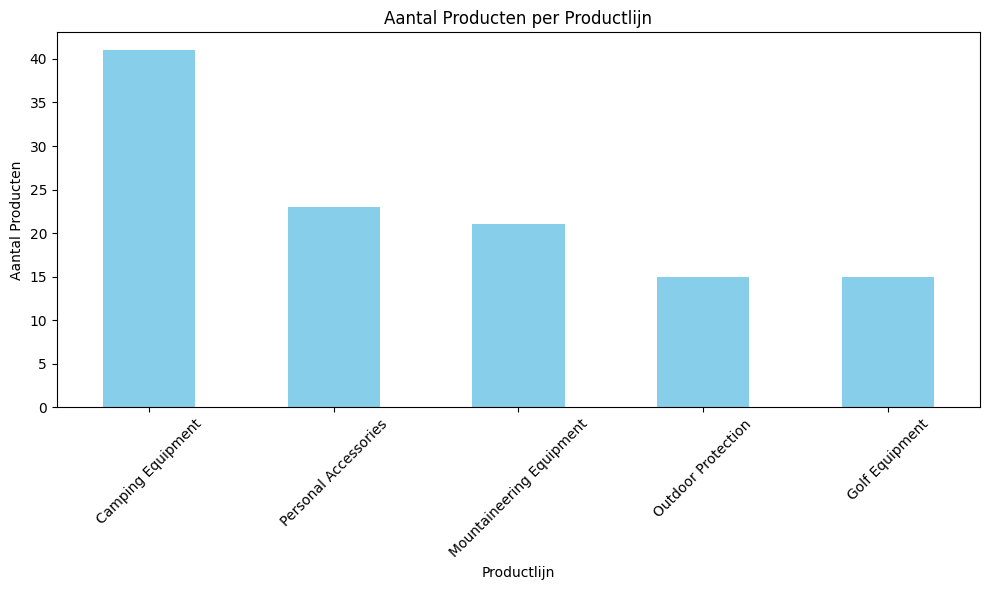

In [ ]:

# Groepeer de data op productlijn en tel het aantal producten
product_per_line = product_dw['PRODUCT_LINE_EN'].value_counts()
# Maak een staafdiagram
plt.figure(figsize=(10, 6))
product_per_line.plot(kind='bar', color='skyblue')
plt.title('Aantal Producten per Productlijn')
plt.xlabel('Productlijn')
plt.ylabel('Aantal Producten')
plt.xticks(rotation=45)  # Draai de x-labels voor betere leesbaarheid
plt.tight_layout()
plt.show()


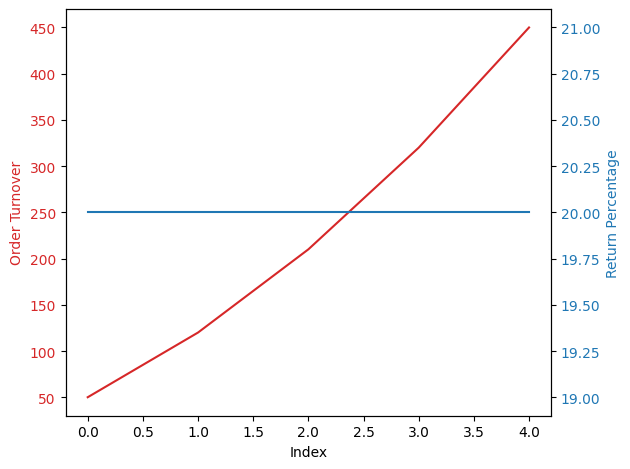

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
order_dw_data = {
    'QUANTITY': [10, 20, 30, 40, 50],
    'UNIT_SALE_PRICE': [5, 6, 7, 8, 9],
    'UNIT_COST': [3, 4, 5, 6, 7],
    'RETURN_QUANTITY': [2, 4, 6, 8, 10]
}

order_dw = pd.DataFrame(order_dw_data)

def ToOrderTurnover(quantity, sale_price):
    return float(quantity) * float(sale_price)

def ToOrderProfit(quantity, sale_price, unit_cost):
    return float(quantity) * (float(sale_price) - float(unit_cost))

order_dw['ORDER_TURNOVER'] = order_dw.apply(lambda x: ToOrderTurnover(x['QUANTITY'], x['UNIT_SALE_PRICE']), axis=1)
order_dw['ORDER_PROFIT'] = order_dw.apply(lambda x: ToOrderProfit(x['QUANTITY'], x['UNIT_SALE_PRICE'], x['UNIT_COST']), axis=1)

def ToTurnunder(quantity, sale_price):
    return float(quantity) * float(sale_price)

def ToReturnPercentage(quantity, return_quantity):
    return 100 * (float(return_quantity) / float(quantity))

order_dw['RETURN_PERCENTAGE'] = order_dw.apply(lambda x: ToReturnPercentage(x['QUANTITY'], x['RETURN_QUANTITY']), axis=1)

# Plotting
fig, ax1 = plt.subplots() 

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Order Turnover', color=color)
ax1.plot(order_dw.index, order_dw['ORDER_TURNOVER'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Return Percentage', color=color)
ax2.plot(order_dw.index, order_dw['RETURN_PERCENTAGE'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


testing

In [44]:

# Define functions for calculations
def ForecastCost(quantity, unit_cost):
    return float(quantity) * float(unit_cost)

def ToOrderTurnover(quantity, sale_price):
    return float(quantity) * float(sale_price)

# Assuming you already have the dataframes df_product_dw and order_dw

# Calculate forecast cost for products
df_product_dw['FORECAST_COST'] = df_product_dw.apply(
    lambda x: ForecastCost(x['EXPECTED_VOLUME'], x['PRODUCTION_COST']), 
    axis = 1)

# Calculate order turnover for orders
order_dw['ORDER_TURNOVER'] = order_dw.apply(
    lambda x: ToOrderTurnover(x['QUANTITY'], x['UNIT_SALE_PRICE']), 
    axis = 1)

# Merge dataframes on the common column
merged_data = pd.merge(df_product_dw[['PRODUCT_NUMBER', 'PRODUCTION_COST', 'FORECAST_COST']], 
                       order_dw[['PRODUCT_NUMBER', 'ORDER_TURNOVER']],  # Include PRODUCT_NUMBER here
                       on='PRODUCT_NUMBER', 
                       how='inner')

# Select a smaller range of rows, for example, the first 100 rows
merged_data_subset = merged_data.iloc[:100]


# Plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

bar_width = 0.35
index = merged_data.index

# Plot forecast cost
bar1 = ax.bar(index, merged_data['FORECAST_COST'], bar_width, label='Forecast Cost')

# Plot order turnover
bar2 = ax.bar(index + bar_width, merged_data['ORDER_TURNOVER'], bar_width, label='Order Turnover')

ax.set_xlabel('Product')
ax.set_ylabel('Amount')
ax.set_title('Forecast Cost vs Order Turnover')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_data['PRODUCT_NUMBER'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000162DC18B380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
order_dw

,ORDER_NUMBER,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE,ORDER_DETAIL_CODE,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,ORDER_TURNOVER,ORDER_PROFIT
0,1153,4,6,50,18,2020-04-14,7,47747,2,100,9.64,12.53,11.81,1181.00,217.00
1,1153,4,6,50,18,2020-04-14,7,47994,32,254,18.25,27.37,25.1,6375.40,1739.90
2,1153,4,6,50,18,2020-04-14,7,48015,35,114,19.67,26.54,24.82,2829.48,587.10
3,1153,4,6,50,18,2020-04-14,7,48022,36,130,21.03,34.9,31.44,4087.20,1353.30
4,1153,4,6,50,18,2020-04-14,7,48049,39,74,42.33,67.73,61.38,4542.12,1409.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,9479,338,329,27,15,2022-02-02,5,110788,52,64,19,38,33.25,2128.00,912.00
43059,9479,338,329,27,15,2022-02-02,5,110816,56,24,9,18,15.75,378.00,162.00
43060,9479,338,329,27,15,2022-02-02,5,110827,57,40,40,80,70,2800.00,1200.00
43061,9479,338,329,27,15,2022-02-02,5,110914,78,32,79.19,99,94.05,3009.60,475.52
